# CM3005 Data Science Coursework

# 1. Domain-Specific Area and Objectives

## Domain-Specific Area

The focus of this project is the real estate domain, particularly analyzing and predicting the resale prices of residential flats in Singapore, also known as HDB. Housing prices in Singapore are among the highest globally, and the HDB resale market is a significant component of the real estate sector. Housing markets are also critical economic indicators influencing financial planning and investment decisions. Understanding the factors that influence resale prices is important for stakeholders like real estate investors and potential home buyers to make informed decisions and secure optimal prices.

## Objectives

This project aims to build a predictive model using linear regression to forecast the resale prices of flats based on various socio-economic and property-specific factors. The objectives include:
- Identifying and quantifying key factors that significantly influence resale flat prices.
- Analyzing the relationships between these factors and resale flat prices.
- Training a robust linear regression model to accurately predict flat prices.
- Evaluating the model’s performance using metrics such as RMSE and R-squared.
- Exploring potential improvements through feature engineering, cross-validation, and advanced validation techniques to enhance reliability.

The results could potentially contribute new house buyers with valuable insights to make informed decisions, such as the optimal time to enter the market. In addition, investors with insights into resale property value trends, aiding in better financial planning and investment decisions. Policymakers might also benefit by using these insights to design housing policies that align with market dynamics.

## Rationale for Linear Regression

Linear regression is selected due to its interpretability and suitability for identifying linear trends among variables. Many socio-economic factors, such as income levels, inflation rates, and GDP growth, are known to exhibit linear relationships with property prices. For instance, GDP growth is often correlated with higher incomes and increased purchasing power, leading to higher demand for housing while inflation impacts the cost of living and investment decisions, often resulting in proportional increases in property prices. 

Linear regression offers not only predictions but also insights into the strength of these relationships through its coefficients. While linear regression has limitations, such as assuming linearity and sensitivity to outliers, its simplicity and explainability make it an ideal starting point. Feature engineering and rigorous cross-validation techniques will be used to mitigate potential issues and enhance the model’s predictions.

## References

The primary dataset used in this project is from Data.gov.sg, titled “Resale flat prices based on registration date from Jan-2017 onwards.” It contains information on HDB resale transactions since 2017, including attributes such as flat type, floor area, lease commencement date, and resale price. This dataset is available at: https://data.gov.sg/datasets?query=resale+prices&page=1&formats=CSV&resultId=d_8b84c4ee58e3cfc0ece0d773c8ca6abc.

Additional datasets from Data.gov.sg and other sources will be used to include socio-economic indicators such as GDP growth, unemployment rates population, and so on. These datasets will be merged based on “year” to create a unified dataset for analysis. Some factors affecting HDB resale prices are also referenced from the article “What Really Drives HDB Resale Flat Prices in Singapore?” available at: https://lifefinance.com.sg/what-really-drives-hdb-resale-flat-prices-in-singapore/.

## 1.1 Import libraries

In [1162]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

from scipy.stats import skew, kurtosis

## 1.2 Initialize Necessary Variables

In [1163]:
# Initialise the year variable to use in all the datasets
year = "2014-01-01"

# 2. Dataset Description

The main dataset selected for this coursework is from “Resale flat prices”, sourced from "https://data.gov.sg/datasets?topics=housing&page=1&resultId=189". From this, I will be narrowing the csv files to 3 files, Mar 2012 onwards, as it uses resale prices based on registeration date (more accurate than approval date). The dataset includes the following columns:

- Month - Month of sale
- Town - Residential area of the flat
- Flat Type - Classification of units by room size
- Block - A HDB building comprising multiple flats or apartments
- Street Name - Name of the road the HDB flat is located along
- Storey Range - Estimated range of floors of the unit
- Floor Area - Total interior space within the unit, in square meters
- Flat Model - Classification of units by generation of which the flat was made
- Lease Commencement Date - Beginning of a lease agreement
- Remaining Lease - Remaining time on the lease of flat.
- Resale Price - Cost of the flat

This metadata is taken from the legend by data.gov.sg.

## Size and Structure

The dataset is spread across three CSV files: March 2012 to December 2014 (52.2k rows, 4MB), January 2015 to December 2016 (37.8k rows, 2.9MB), and January 2017 to December 2018 (197.2k rows, 18.5MB). The combined dataset has 287.2k rows and 11 columns, with a total size of 25.4MB. The numerical (e.g., Floor Area, Resale Price) and categorical (e.g., Flat Type, Flat Model) data types make it highly structured for analysis.

## Origin and Acquisition

This dataset is maintained by the Singapore government and HDB, and is regularly updated to ensure accuracy and timeliness. It was acquired directly from the Data.gov.sg platform, which is known for its reliability and consistency in providing high-quality, open government data.

## Fitness for LR

This dataset's numerical attributes, such as floor area and lease commencement year, can serve as independent variables to predict the dependent variable, resale price. Additionally, categorical variables like flat type can be encoded for use in regression models, enabling the exploration of relationships and trends. The large size of the dataset ensures that models have plenty of data to train on.

## Other Datasets

In addition I will also be using the following datasets that will be explored and documented in the next section:
- Consumer Price Index (CPI), 
- Interest Rates, 
- Employment Rates, 
- Median Income,
- Population

## 2.1 Dataset Initialization

### 2.1.1 Resale Flat Price Dataset Description
- Source: data.gov.sg
- Relevance: This dataset contains the target variable as well as features to use for prediction.

In [1164]:
# Load the Dataset
try:
    resaleFlatPrice2012 = pd.read_csv('./data/resaleFlatPrices2012-14.csv')
    resaleFlatPrice2015 = pd.read_csv('./data/resaleFlatPrices2015-16.csv')
    resaleFlatPrice2017 = pd.read_csv('./data/resaleFlatPrices2017.csv')

    resaleFlatPrice = pd.concat([resaleFlatPrice2012, resaleFlatPrice2015, resaleFlatPrice2017], axis=0, ignore_index=True)

    # Display information about the merged dataset
    print(resaleFlatPrice.head())
    print("")
    print(resaleFlatPrice.info())
    print("")
    print("Shape", resaleFlatPrice.shape)
except FileNotFoundError:
    print("Dataset not found. Please ensure the file is in the correct location.")

     month        town flat_type block        street_name storey_range  \
0  2012-03  ANG MO KIO    2 ROOM   172   ANG MO KIO AVE 4     06 TO 10   
1  2012-03  ANG MO KIO    2 ROOM   510   ANG MO KIO AVE 8     01 TO 05   
2  2012-03  ANG MO KIO    3 ROOM   610   ANG MO KIO AVE 4     06 TO 10   
3  2012-03  ANG MO KIO    3 ROOM   474  ANG MO KIO AVE 10     01 TO 05   
4  2012-03  ANG MO KIO    3 ROOM   604   ANG MO KIO AVE 5     06 TO 10   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            45.0        Improved                 1986      250000.0   
1            44.0        Improved                 1980      265000.0   
2            68.0  New Generation                 1980      315000.0   
3            67.0  New Generation                 1984      320000.0   
4            67.0  New Generation                 1980      321000.0   

  remaining_lease  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

<

### 2.1.2 CPI Dataset Description
- Source: data.gov.sg
- Relevance: Represents inflation, which impacts purchasing power and housing prices.

In [1165]:
# Load the Dataset
try:
    cpi = pd.read_csv('./data/CPI.csv')
    # Display information about the dataset
    print(cpi.head())
    print("")
    print("Shape", cpi.shape)
except FileNotFoundError:
    print("Dataset not found. Please ensure the file is in the correct location.")

                            DataSeries  2024Oct  2024Sep  2024Aug  2024Jul  \
0                            All Items  117.058  116.864  116.570  116.328   
1                                 Food  119.264  118.886  118.666  118.303   
2      Food Excl Food Serving Services  117.907  117.605  117.096  116.512   
3                      Bread & Cereals  119.428  118.818  118.120  118.209   
4                                 Meat  123.758  124.054  123.747  122.224   

   2024Jun  2024May  2024Apr  2024Mar  2024Feb  ...  1961Oct  1961Sep  \
0  116.065  116.316  116.363  115.406  115.449  ...   24.527   24.455   
1  118.108  117.951  117.517  117.499  117.787  ...   21.701   21.549   
2  116.601  116.696  116.031  116.312  117.559  ...       na       na   
3  117.849  117.711  117.152  116.644  116.501  ...       na       na   
4  122.779  123.043  123.372  124.619  124.916  ...       na       na   

   1961Aug  1961Jul  1961Jun  1961May  1961Apr  1961Mar  1961Feb  1961Jan  
0   24.551   24.

### 2.1.3 Interest Rates Dataset Description
- Source: data.gov.sg
- Relevance: Reflect borrowing costs, affecting housing affordability.

In [1166]:
# Load the Dataset
try:
    interestRate = pd.read_csv('./data/banksInterestRates.csv')
    # Display information about the dataset
    print(interestRate.head())
    print("")
    print(interestRate.info())
    print("")
    print("Shape", interestRate.shape)
except FileNotFoundError:
    print("Dataset not found. Please ensure the file is in the correct location.")

                                          DataSeries  2024Nov  2024Oct  \
0          Government Securities - 5-Year Bond Yield     2.73     2.71   
1          Government Securities - 2-Year Bond Yield     2.77     2.69   
2         Government Securities - 10-Year Bond Yield     2.74     2.82   
3  Government Securities - 1-Year Treasury Bills ...     2.75     2.73   
4         Government Securities - 15-Year Bond Yield     2.80     2.87   

   2024Sep  2024Aug  2024Jul  2024Jun  2024May  2024Apr  2024Mar  ...  \
0     2.50     2.56     2.80     3.19     3.34     3.40     3.05  ...   
1     2.44     2.55     2.94     3.34     3.42     3.50     3.36  ...   
2     2.62     2.71     2.88     3.21     3.36     3.45     3.11  ...   
3     3.04     3.14     3.39     3.58     3.57     3.57     3.46  ...   
4     2.69     2.79     2.90     3.21     3.34     3.45     3.09  ...   

   1988Oct  1988Sep  1988Aug  1988Jul  1988Jun  1988May  1988Apr  1988Mar  \
0     5.38     5.62     5.74     5.32  

### 2.1.4 Median Income Dataset Description
- Source: data.gov.sg
- Relevance: Affects affordability and purchasing capacity.

In [1167]:
# Load the Dataset
try:
    salary = pd.read_csv('./data/medianIncome.csv')
    # Display information about the dataset
    print(salary.head())
    print("")
    print(salary.info())
    print("")
    print("Shape", salary.shape)
except FileNotFoundError:
    print("Dataset not found. Please ensure the file is in the correct location.")

   year     sex  med_income_incl_empcpf  med_income_excl_empcpf
0  2001    male                    2514                    2250
1  2001  female                    2204                    1950
2  2002    male                    2514                    2176
3  2002  female                    2219                    1950
4  2003    male                    2514                    2217

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    42 non-null     int64 
 1   sex                     42 non-null     object
 2   med_income_incl_empcpf  42 non-null     int64 
 3   med_income_excl_empcpf  42 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB
None

Shape (42, 4)


### 2.1.5 Employment Dataset Description
- Source: data.gov.sg
- Relevance: Indicates economic stability, influencing housing demand.

In [1168]:
# Load the Dataset
try:
    employmentRate = pd.read_csv('./data/employmentRate.csv')
    # Display information about the dataset
    print(employmentRate.head())
    print("")
    print(employmentRate.info())
    print("")
    print("Shape", employmentRate.shape)
except FileNotFoundError:
    print("Dataset not found. Please ensure the file is in the correct location.")

   year     sex  emp_rate
0  1991    male      90.9
1  1991  female      50.8
2  1992    male      90.0
3  1992  female      51.9
4  1993    male      90.3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      60 non-null     int64  
 1   sex       60 non-null     object 
 2   emp_rate  60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB
None

Shape (60, 3)


### 2.1.6 Population Dataset Description
- Source: https://tablebuilder.singstat.gov.sg/table/TS/M810811
- Relevance: Correlates with demand for residential properties.

In [1169]:
# Load the Dataset
try:
    population = pd.read_csv('./data/population.csv')
    # Display information about the dataset
    print(population.head())
    print("")
    print(population.info())
    print("")
    print("Shape", population.shape)
except FileNotFoundError:
    print("Dataset not found. Please ensure the file is in the correct location.")

   Data Series  Total Population (Number)  \
0         2024                    6036860   
1         2023                    5917648   
2         2022                    5637022   
3         2021                    5453566   
4         2020                    5685807   

   Total Population -> 0 - 14 Years (Number)  \
0                                     677425   
1                                     681459   
2                                     675638   
3                                     670531   
4                                     688984   

   Total Population -> 15 - 64 Years (Number)  \
0                                     4530831   
1                                     4451242   
2                                     4226527   
3                                     4087584   
4                                     4320933   

   Total Population -> 65 Years & Over (Number)  \
0                                        828604   
1                                        78

### 2.1.7 Schools Dataset Description (Additional)
- Source: data.gov.sg
- Relevance: Proximity to schools may influence property prices.

In [1170]:
# Load the Dataset
try:
    schools = pd.read_csv('./data/schools.csv')
    # Display information about the dataset
    print(schools.head())
    print("")
    print(schools.info())
    print("")
    print("Shape", schools.shape)
except FileNotFoundError:
    print("Dataset not found. Please ensure the file is in the correct location.")

                      school_name                            url_address  \
0        ADMIRALTY PRIMARY SCHOOL       https://admiraltypri.moe.edu.sg/   
1      ADMIRALTY SECONDARY SCHOOL     http://www.admiraltysec.moe.edu.sg   
2    AHMAD IBRAHIM PRIMARY SCHOOL  http://www.ahmadibrahimpri.moe.edu.sg   
3  AHMAD IBRAHIM SECONDARY SCHOOL  http://www.ahmadibrahimsec.moe.edu.sg   
4                  AI TONG SCHOOL           http://www.aitong.moe.edu.sg   

                   address  postal_code telephone_no telephone_no_2    fax_no  \
0    11   WOODLANDS CIRCLE       738907     63620598             na  63627512   
1  31   WOODLANDS CRESCENT       737916     63651733       63654596  63652774   
2    10   YISHUN STREET 11       768643     67592906             na  67592927   
3     751  YISHUN AVENUE 7       768928     67585384             na  67557778   
4   100  Bright Hill Drive       579646     64547672             na  64532726   

  fax_no_2            email_address                  mrt

### 2.1.8 Hawker Centres Dataset Description (Additional)
- Source: data.gov.sg
- Relevance: Proximity to hawker centres may influence property prices.

In [1171]:
# Load the Dataset
try:
    hawkerCentres = pd.read_csv('./data/hawkerCentres.csv')
    # Display information about the dataset
    print(hawkerCentres.head())
    print("")
    print(hawkerCentres.info())
    print("")
    print("Shape", hawkerCentres.shape)
except FileNotFoundError:
    print("Dataset not found. Please ensure the file is in the correct location.")

            name_of_centre                                 location_of_centre  \
0    Adam Road Food Centre                            2, Adam Road, S(289876)   
1  Amoy Street Food Centre  National Development Building, Annex B, Telok ...   
2        Bedok Food Centre                           1, Bedok Road, S(469572)   
3      Beo Crescent Market                       38A, Beo Crescent, S(169982)   
4       Berseh Food Centre                        166, Jalan Besar, S(208877)   

  type_of_centre       owner  no_of_stalls  no_of_cooked_food_stalls  \
0             HC  Government            32                        32   
1             HC  Government           135                       134   
2             HC  Government            32                        32   
3            MHC  Government            94                        32   
4             HC  Government            66                        66   

   no_of_mkt_produce_stalls  
0                         0  
1                   

# 3. Data Cleaning and Preparation

The datasets will be going through several preprocessing steps to ensure they are clean, consistent, and suitable for analysis.

Preprocessing Steps
1. Handling Missing Values:
- Missing entries in key columns will be logged, and addressed accordingly.
2. Standarization:
- Columns will be standardized to ensure compactability when merging.
3. Merging Datasets:
- All datasets will be joined using the month column as the key. 
- Irrelevant columns will be dropped.

The cleaned and merged dataset will be in First Normal Form (1NF) and ready for exploratory data analysis (EDA) and feature engineering.

## 3.1: Check for missing values in all datasets

In [1172]:
# Combine all datasets into a dictionary
datasets = {
    "Resale Flat Prices": resaleFlatPrice,
    "CPI": cpi,
    "Interest Rates": interestRate,
    "Median Income": salary,
    "Employment Rate": employmentRate,
    "Population": population,
    "Schools": schools,
    "Hawker Centres": hawkerCentres
}

In [1173]:
# Check for null or NA values
print("Checking for null or NA values in datasets:")
for name, dataset in datasets.items():
    print(f"\n{name}:")
    if dataset.isnull().sum().sum() > 0:
        print(dataset.isnull().sum())
    else:
        print("No null or NA values found.")

Checking for null or NA values in datasets:

Resale Flat Prices:
month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease        52203
dtype: int64

CPI:
No null or NA values found.

Interest Rates:
No null or NA values found.

Median Income:
No null or NA values found.

Employment Rate:
No null or NA values found.

Population:
No null or NA values found.

Schools:
school_name             0
url_address             0
address                 0
postal_code             0
telephone_no            0
telephone_no_2          0
fax_no                  0
fax_no_2                0
email_address           0
mrt_desc                0
bus_desc                0
principal_name          0
first_vp_name           4
second_vp_name         10
third_vp_name      

## 3.2: Drop irrelevant columns and rows

### 3.2.1: Resale Flat Price Dataset

- Combine 'block' and 'street_name' columns into a single 'address' column.
- Drop 'block' and 'street_name' columns.
- Drop rows with timestamp before the specificed year.

In [1174]:
# Check if the necessary columns exist
if 'block' in resaleFlatPrice.columns and 'street_name' in resaleFlatPrice.columns and 'remaining_lease' in resaleFlatPrice.columns:
    # Combine 'block' and 'street_name' columns into a single column
    resaleFlatPrice['address'] = resaleFlatPrice['block'] + ' ' + resaleFlatPrice['street_name']

    # Drop the 'block' and 'street_name' columns
    resaleFlatPrice.drop(columns=['block', 'street_name', 'remaining_lease'], inplace=True)

# Display the updated DataFrame
resaleFlatPrice.head()


,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address
0,2012-03,ANG MO KIO,2 ROOM,06 TO 10,45.0,Improved,1986,250000.0,172 ANG MO KIO AVE 4
1,2012-03,ANG MO KIO,2 ROOM,01 TO 05,44.0,Improved,1980,265000.0,510 ANG MO KIO AVE 8
2,2012-03,ANG MO KIO,3 ROOM,06 TO 10,68.0,New Generation,1980,315000.0,610 ANG MO KIO AVE 4
3,2012-03,ANG MO KIO,3 ROOM,01 TO 05,67.0,New Generation,1984,320000.0,474 ANG MO KIO AVE 10
4,2012-03,ANG MO KIO,3 ROOM,06 TO 10,67.0,New Generation,1980,321000.0,604 ANG MO KIO AVE 5


In [1175]:
# Ensure 'month' column is in datetime format
resaleFlatPrice['month'] = pd.to_datetime(resaleFlatPrice['month'], format='%Y-%m')

# Sort the DataFrame in descending order of the 'month' column
resaleFlatPrice.sort_values(by='month', ascending=False, inplace=True)

# Filter and keep only rows where the year is greater than or equal to the specified year
resaleFlatPrice = resaleFlatPrice[resaleFlatPrice['month'] >= year]

# Reset the index to 0
resaleFlatPrice.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(resaleFlatPrice.head())
print("")
print("Shape:", resaleFlatPrice.shape)

       month         town flat_type storey_range  floor_area_sqm  \
0 2024-12-01  JURONG WEST    5 ROOM     10 TO 12           114.0   
1 2024-12-01  BUKIT BATOK    4 ROOM     04 TO 06            89.0   
2 2024-12-01  BUKIT BATOK    4 ROOM     07 TO 09            89.0   
3 2024-12-01  BUKIT BATOK    4 ROOM     10 TO 12            93.0   
4 2024-12-01    TOA PAYOH    4 ROOM     22 TO 24            91.0   

          flat_model  lease_commence_date  resale_price  \
0  Premium Apartment                 2008      620000.0   
1         Simplified                 1986      500000.0   
2         Simplified                 1987      465000.0   
3     New Generation                 1986      515000.0   
4            Model A                 2009      970888.0   

                  address  
0  989A JURONG WEST ST 93  
1      501 BT BATOK ST 52  
2      333 BT BATOK ST 32  
3      316 BT BATOK ST 32  
4      79D TOA PAYOH CTRL  

Shape: (249935, 9)


### 3.2.2: CPI Dataset

TODOs:
- Drop all rows except All Items.
- Tranpose the dataset and rename the columns to 'month' and 'cpi'.
- Drop the column 'DataSeries'.
- Drop rows from 'month' column with date and time before the specified year above.

In [1176]:
# Filter the dataset to keep only rows where the 'DataSeries' is 'All Items'
cpi = cpi[cpi['DataSeries'] == 'All Items']

# Transform the data from wide to long format
cpi = cpi.melt(id_vars=['DataSeries'], var_name='month', value_name='cpi')

cpi.head()

,DataSeries,month,cpi
0,All Items,2024Oct,117.058
1,All Items,2024Sep,116.864
2,All Items,2024Aug,116.57
3,All Items,2024Jul,116.328
4,All Items,2024Jun,116.065


In [1177]:
try:
    # Drop the 'DataSeries' column and rename 'CPI_Value' to 'CPI'
    if 'DataSeries' in cpi.columns:
        cpi.drop(columns=['DataSeries'], inplace=True)
        print("Dropped 'DataSeries' column.")
    else:
        print("'DataSeries' column has already been dropped.")

    # Display the updated DataFrame
    print("")
    print(cpi.head())
except Exception as e:
    print(f"An error occurred: {e}")

Dropped 'DataSeries' column.

     month      cpi
0  2024Oct  117.058
1  2024Sep  116.864
2  2024Aug   116.57
3  2024Jul  116.328
4  2024Jun  116.065


In [1178]:
try:
    # Ensure 'month' column is in datetime format
    cpi['month'] = pd.to_datetime(cpi['month'], format='%Y%b', errors='coerce')
    
    # Drop rows with invalid or missing dates
    cpi.dropna(subset=['month'], inplace=True)

    # Filter and keep only rows where the year is greater than or equal to the specified year
    cpi = cpi[cpi['month'] >= year]

    # Reset the index to start from 0
    cpi.reset_index(drop=True, inplace=True)

    # Display the updated DataFrame and its shape
    print(cpi.head())
    print("")
    print("Shape:", cpi.shape)
except Exception as e:
    print(f"An error occurred: {e}")

       month      cpi
0 2024-10-01  117.058
1 2024-09-01  116.864
2 2024-08-01   116.57
3 2024-07-01  116.328
4 2024-06-01  116.065

Shape: (130, 2)


### 3.2.3: Interest Rates Dataset

TODOs:
- Drop all rows except Singapore Overnight Rate Average.
- Tranpose the dataset and rename the columns to 'month' and 'interest_rate'.
- Drop the column 'DataSeries'.
- Drop rows from 'month' column with date and time before the specified year above.

In [1179]:
# Filter the dataset to keep only rows where the 'DataSeries' is 'All Items'
interestRate = interestRate[interestRate['DataSeries'] == 'Singapore Overnight Rate Average']

# Transform the data from wide to long format
interestRate = interestRate.melt(id_vars=['DataSeries'], var_name='month', value_name='interest_rate')

interestRate.head()

,DataSeries,month,interest_rate
0,Singapore Overnight Rate Average,2024Nov,3.0839
1,Singapore Overnight Rate Average,2024Oct,3.1559
2,Singapore Overnight Rate Average,2024Sep,3.8808
3,Singapore Overnight Rate Average,2024Aug,3.5355
4,Singapore Overnight Rate Average,2024Jul,3.4336


In [1180]:
try:
    # Drop the 'DataSeries' column and rename 'CPI_Value' to 'CPI'
    if 'DataSeries' in interestRate.columns:
        interestRate.drop(columns=['DataSeries'], inplace=True)
        print("Dropped 'DataSeries' column.")
    else:
        print("'DataSeries' column has already been dropped.")

    # Display the updated DataFrame
    print("")
    print(interestRate.head())
except Exception as e:
    print(f"An error occurred: {e}")

Dropped 'DataSeries' column.

     month interest_rate
0  2024Nov        3.0839
1  2024Oct        3.1559
2  2024Sep        3.8808
3  2024Aug        3.5355
4  2024Jul        3.4336


In [1181]:
try:
    # Ensure 'month' column is in datetime format
    interestRate['month'] = pd.to_datetime(interestRate['month'], format='%Y%b', errors='coerce')
    
    # Drop rows with invalid or missing dates
    interestRate.dropna(subset=['month'], inplace=True)

    # Filter and keep only rows where the year is greater than or equal to the specified year
    interestRate = interestRate[interestRate['month'] >= year]

    # Reset the index to start from 0
    interestRate.reset_index(drop=True, inplace=True)

    # Display the updated DataFrame and its shape
    print(interestRate.head())
    print("")
    print("Shape:", interestRate.shape)
except Exception as e:
    print(f"An error occurred: {e}")

       month interest_rate
0 2024-11-01        3.0839
1 2024-10-01        3.1559
2 2024-09-01        3.8808
3 2024-08-01        3.5355
4 2024-07-01        3.4336

Shape: (131, 2)


### 3.2.4: Salary Dataset

TODOs:
- Drop the med_income_excl_empcpf column.

In [1182]:
# Modify the DataFrame
try:
    # Remove the 'med_income_excl_empcpf' column
    salary.drop(columns=['med_income_excl_empcpf'], inplace=True)
    
    # Rename the 'year' column to 'month'
    salary.rename(columns={'year': 'month'}, inplace=True)
    
    # Convert 'month' column to datetime format with a placeholder month (e.g., January)
    salary['month'] = pd.to_datetime(salary['month'].astype(str) + '-01', format='%Y-%m')
    
    # Display the updated DataFrame
    print(salary.head())
except Exception as e:
    print(f"An error occurred: {e}")

    

       month     sex  med_income_incl_empcpf
0 2001-01-01    male                    2514
1 2001-01-01  female                    2204
2 2002-01-01    male                    2514
3 2002-01-01  female                    2219
4 2003-01-01    male                    2514


In [1183]:
try:
    # Group by 'month' and calculate the average income
    salary = salary.groupby('month', as_index=False).agg({'med_income_incl_empcpf': 'mean'})
    
    # Rename the column
    salary.rename(columns={'med_income_incl_empcpf': 'median_income'}, inplace=True)

     # Sort by 'month' in descending order
    salary.sort_values(by='month', ascending=False, inplace=True)

    # Filter rows with dates less than the specificed year
    salary = salary[salary['month'] >= year]

    # Reset index
    salary.reset_index(drop=True, inplace=True)

   # Display the updated DataFrame
    print(salary.head())
except Exception as e:
    print(f"An error occurred: {e}")

       month  median_income
0 2022-01-01         5199.0
1 2021-01-01         4656.0
2 2020-01-01         4546.5
3 2019-01-01         4569.5
4 2018-01-01         4387.5


### 3.2.5: Employment Dataset

TODOs:
- Drop the med_income_excl_empcpf column.
- Combine the male and female rows into a single row based on the month
- Drop the 'sex' column.

In [1184]:
# Modify the DataFrame
try:
    # Rename the 'year' column to 'month'
    employmentRate.rename(columns={'year': 'month'}, inplace=True)
    
    # Convert 'month' column to datetime format with a placeholder month (e.g., January)
    employmentRate['month'] = pd.to_datetime(employmentRate['month'].astype(str) + '-01', format='%Y-%m')
    
    # Display the updated DataFrame
    print(employmentRate.head())
except Exception as e:
    print(f"An error occurred: {e}")


       month     sex  emp_rate
0 1991-01-01    male      90.9
1 1991-01-01  female      50.8
2 1992-01-01    male      90.0
3 1992-01-01  female      51.9
4 1993-01-01    male      90.3


In [1185]:
try:
    # Group by 'month' and calculate the average income
    employmentRate = employmentRate.groupby('month', as_index=False).agg({'emp_rate': 'mean'})

    # Sort by 'month' in descending order
    employmentRate.sort_values(by='month', ascending=False, inplace=True)

    # Filter rows with dates less than the specificed year
    employmentRate = employmentRate[employmentRate['month'] >= year]

    # Reset index
    employmentRate.reset_index(drop=True, inplace=True)

   # Display the updated DataFrame
    print(employmentRate.head())
except Exception as e:
    print(f"An error occurred: {e}")

       month  emp_rate
0 2023-01-01     82.80
1 2022-01-01     82.90
2 2021-01-01     82.00
3 2020-01-01     80.55
4 2019-01-01     81.05


### 3.2.6: Population Dataset

TODOs:
- Rename 'Total Population -> 15 - 64 Years (Number)' to 'population(15-64)'
- Drop all other columns except 'month' and 'population(15-64)'

In [1186]:
try:

    # Rename the 'Data Series' column to 'month'
    population.rename(columns={'Data Series': 'month', 'Total Population -> 15 - 64 Years (Number)':'population(15-64)'}, inplace=True)

    # Convert 'month' column to datetime format with a placeholder month (e.g., January)
    population['month'] = pd.to_datetime(population['month'].astype(str) + '-01', format='%Y-%m')

    # Retain only the 'month' and 'population(15-64)' columns
    population = population[['month', 'population(15-64)']]

   # Display the updated DataFrame
    print(population.head())
except Exception as e:
    print(f"An error occurred: {e}")

       month  population(15-64)
0 2024-01-01            4530831
1 2023-01-01            4451242
2 2022-01-01            4226527
3 2021-01-01            4087584
4 2020-01-01            4320933


## 3.3: Merge All the Datasets

Combine all the dataframes into a single dataframe using the 'month' column as the key.

In [ ]:
merged_df = resaleFlatPrice

# Merge all the dataframes
dataframes = [cpi, interestRate, salary, employmentRate, population]

for df in dataframes:
    merged_df = pd.merge(merged_df, df, on='month', how='left')

# Drop rows with NaN values
merged_df.dropna(inplace=True)

# Reset the index
merged_df.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
merged_df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,cpi,interest_rate,median_income,emp_rate,population(15-64)
0,2022-01-01,HOUGANG,3 ROOM,01 TO 03,64.0,Simplified,1986,327000.0,501 HOUGANG AVE 8,104.626,0.4113,5199.0,82.9,4226527.0
1,2022-01-01,HOUGANG,3 ROOM,01 TO 03,73.0,New Generation,1978,310000.0,22 HOUGANG AVE 3,104.626,0.4113,5199.0,82.9,4226527.0
2,2022-01-01,HOUGANG,3 ROOM,04 TO 06,66.0,New Generation,1982,322000.0,114 HOUGANG AVE 1,104.626,0.4113,5199.0,82.9,4226527.0
3,2022-01-01,HOUGANG,3 ROOM,01 TO 03,64.0,Simplified,1986,315000.0,625 HOUGANG AVE 8,104.626,0.4113,5199.0,82.9,4226527.0
4,2022-01-01,HOUGANG,3 ROOM,01 TO 03,67.0,New Generation,1993,315000.0,315 HOUGANG AVE 5,104.626,0.4113,5199.0,82.9,4226527.0


### 3.3.1: Reverifying the Merged Dataset

In [1188]:
print(merged_df.isnull().sum())

month                  0
town                   0
flat_type              0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
address                0
cpi                    0
interest_rate          0
median_income          0
emp_rate               0
population(15-64)      0
dtype: int64


In [1189]:
print(merged_df.dtypes)

month                  datetime64[ns]
town                           object
flat_type                      object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
address                        object
cpi                            object
interest_rate                  object
median_income                 float64
emp_rate                      float64
population(15-64)             float64
dtype: object


### 3.3.2: Further Processing

In [1190]:
# Convert 'cpi' to numeric
merged_df['cpi'] = pd.to_numeric(merged_df['cpi'], errors='coerce')

# Convert 'interest_rate' to numeric
merged_df['interest_rate'] = pd.to_numeric(merged_df['interest_rate'], errors='coerce')

# Check the updated data types
print(merged_df.dtypes)

month                  datetime64[ns]
town                           object
flat_type                      object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
address                        object
cpi                           float64
interest_rate                 float64
median_income                 float64
emp_rate                      float64
population(15-64)             float64
dtype: object


In [1191]:
print(merged_df.head())

       month     town flat_type storey_range  floor_area_sqm      flat_model  \
0 2022-01-01  HOUGANG    3 ROOM     01 TO 03            64.0      Simplified   
1 2022-01-01  HOUGANG    3 ROOM     01 TO 03            73.0  New Generation   
2 2022-01-01  HOUGANG    3 ROOM     04 TO 06            66.0  New Generation   
3 2022-01-01  HOUGANG    3 ROOM     01 TO 03            64.0      Simplified   
4 2022-01-01  HOUGANG    3 ROOM     01 TO 03            67.0  New Generation   

   lease_commence_date  resale_price            address      cpi  \
0                 1986      327000.0  501 HOUGANG AVE 8  104.626   
1                 1978      310000.0   22 HOUGANG AVE 3  104.626   
2                 1982      322000.0  114 HOUGANG AVE 1  104.626   
3                 1986      315000.0  625 HOUGANG AVE 8  104.626   
4                 1993      315000.0  315 HOUGANG AVE 5  104.626   

   interest_rate  median_income  emp_rate  population(15-64)  
0         0.4113         5199.0      82.9      

Remove all columns that are not numerical for now

In [1192]:
object_columns = merged_df.select_dtypes(include=['object']).columns

object_columns

Index(['town', 'flat_type', 'storey_range', 'flat_model', 'address'], dtype='object')

In [1193]:
numerical_merged_df = merged_df.drop(columns=object_columns)

In [1194]:
numerical_merged_df.head()

,month,floor_area_sqm,lease_commence_date,resale_price,cpi,interest_rate,median_income,emp_rate,population(15-64)
0,2022-01-01,64.0,1986,327000.0,104.626,0.4113,5199.0,82.9,4226527.0
1,2022-01-01,73.0,1978,310000.0,104.626,0.4113,5199.0,82.9,4226527.0
2,2022-01-01,66.0,1982,322000.0,104.626,0.4113,5199.0,82.9,4226527.0
3,2022-01-01,64.0,1986,315000.0,104.626,0.4113,5199.0,82.9,4226527.0
4,2022-01-01,67.0,1993,315000.0,104.626,0.4113,5199.0,82.9,4226527.0


# 4. Statistical Analysis

A comprehensive statistical analysis was performed to understand the dataset’s key features and their relationships.

Summary Statistics
- Central Tendency:
- Mean Resale Price: [Insert value]
- Median Resale Price: [Insert value]
- Measures of Spread:
- Standard Deviation: [Insert value]
- Variance: [Insert value]

Distribution Analysis
- Skewness and Kurtosis:
- Resale Price: Skewness = [value], Kurtosis = [value]
- CPI: Skewness = [value], Kurtosis = [value]

The analysis reveals that several features, such as resale_price and CPI, exhibit significant skewness, necessitating transformations to improve linear regression performance.

In [1195]:
print("\nStatistical Summary:")
print(numerical_merged_df.describe())



Statistical Summary:
                               month  floor_area_sqm  lease_commence_date  \
count                          14279    14279.000000         14279.000000   
mean   2018-10-02 06:28:09.698158080       97.035766          1993.784299   
min              2014-01-01 00:00:00       31.000000          1966.000000   
25%              2016-01-01 00:00:00       76.000000          1984.000000   
50%              2019-01-01 00:00:00       94.000000          1993.000000   
75%              2021-01-01 00:00:00      112.000000          2003.000000   
max              2022-01-01 00:00:00      215.000000          2019.000000   
std                              NaN       24.204530            13.054353   

       resale_price           cpi  interest_rate  median_income      emp_rate  \
count  1.427900e+04  14279.000000   14279.000000   14279.000000  14279.000000   
mean   4.602518e+05    100.507437       0.667148    4480.198368     81.263832   
min    1.500000e+05     98.372000       0

In [1196]:
# Statistical Analysis: Measures of Skewness and Kurtosis
print("Skewness and Kurtosis for each numeric column:")
for col in numerical_merged_df.columns:
    if numerical_merged_df[col].dtype in ['float64', 'int64']:
        print(f"{col}: Skewness = {skew(numerical_merged_df[col]):.2f}, Kurtosis = {kurtosis(numerical_merged_df[col]):.2f}")

Skewness and Kurtosis for each numeric column:
floor_area_sqm: Skewness = 0.28, Kurtosis = -0.22
lease_commence_date: Skewness = 0.20, Kurtosis = -0.96
resale_price: Skewness = 1.09, Kurtosis = 1.44
cpi: Skewness = 1.25, Kurtosis = 0.23
interest_rate: Skewness = 1.00, Kurtosis = -0.70
median_income: Skewness = 0.14, Kurtosis = -0.72
emp_rate: Skewness = 0.62, Kurtosis = -0.89
population(15-64): Skewness = -1.00, Kurtosis = -0.41


#### Summary:

1.	Highly Skewed Columns:
- cpi and resale_price have notable positive skewness. Consider transformations to normalize these columns for linear regression during feature engineering.
- population(15-64) has notable negative skewness. Consider transformations to normalize this column for linear regression during feature engineering.
2.	Columns with High Kurtosis:
- resale_price has high kurtosis, indicating the need for outlier analysis to ensure robustness.
- Other columns show light tails, suggesting limited extreme values which may help in building a stable regression model.

# 5. Data Visualization

The following visualizations were created to explore data trends and relationships:
1. Scatter Plots:
- Visualized relationships between resale price and key features such as floor area, lease commencement date, and CPI.
- Example Insight: A strong positive correlation was observed between floor area and resale price.
2. Correlation Heatmap:
- A heatmap was generated to identify feature relationships. Features like floor_area_sqm showed strong correlations with resale price.
3. Histograms and KDE Plots:
- Distribution plots highlighted skewness in variables like resale price and CPI.
4. Time-Series Trends:
- Resale prices over time were plotted to capture temporal trends.

The most critical visualization was the scatter plot between floor area and resale price, which clearly demonstrated a linear relationship.

## 5.1: Plot Relationship Between Resale Price and Other Variables

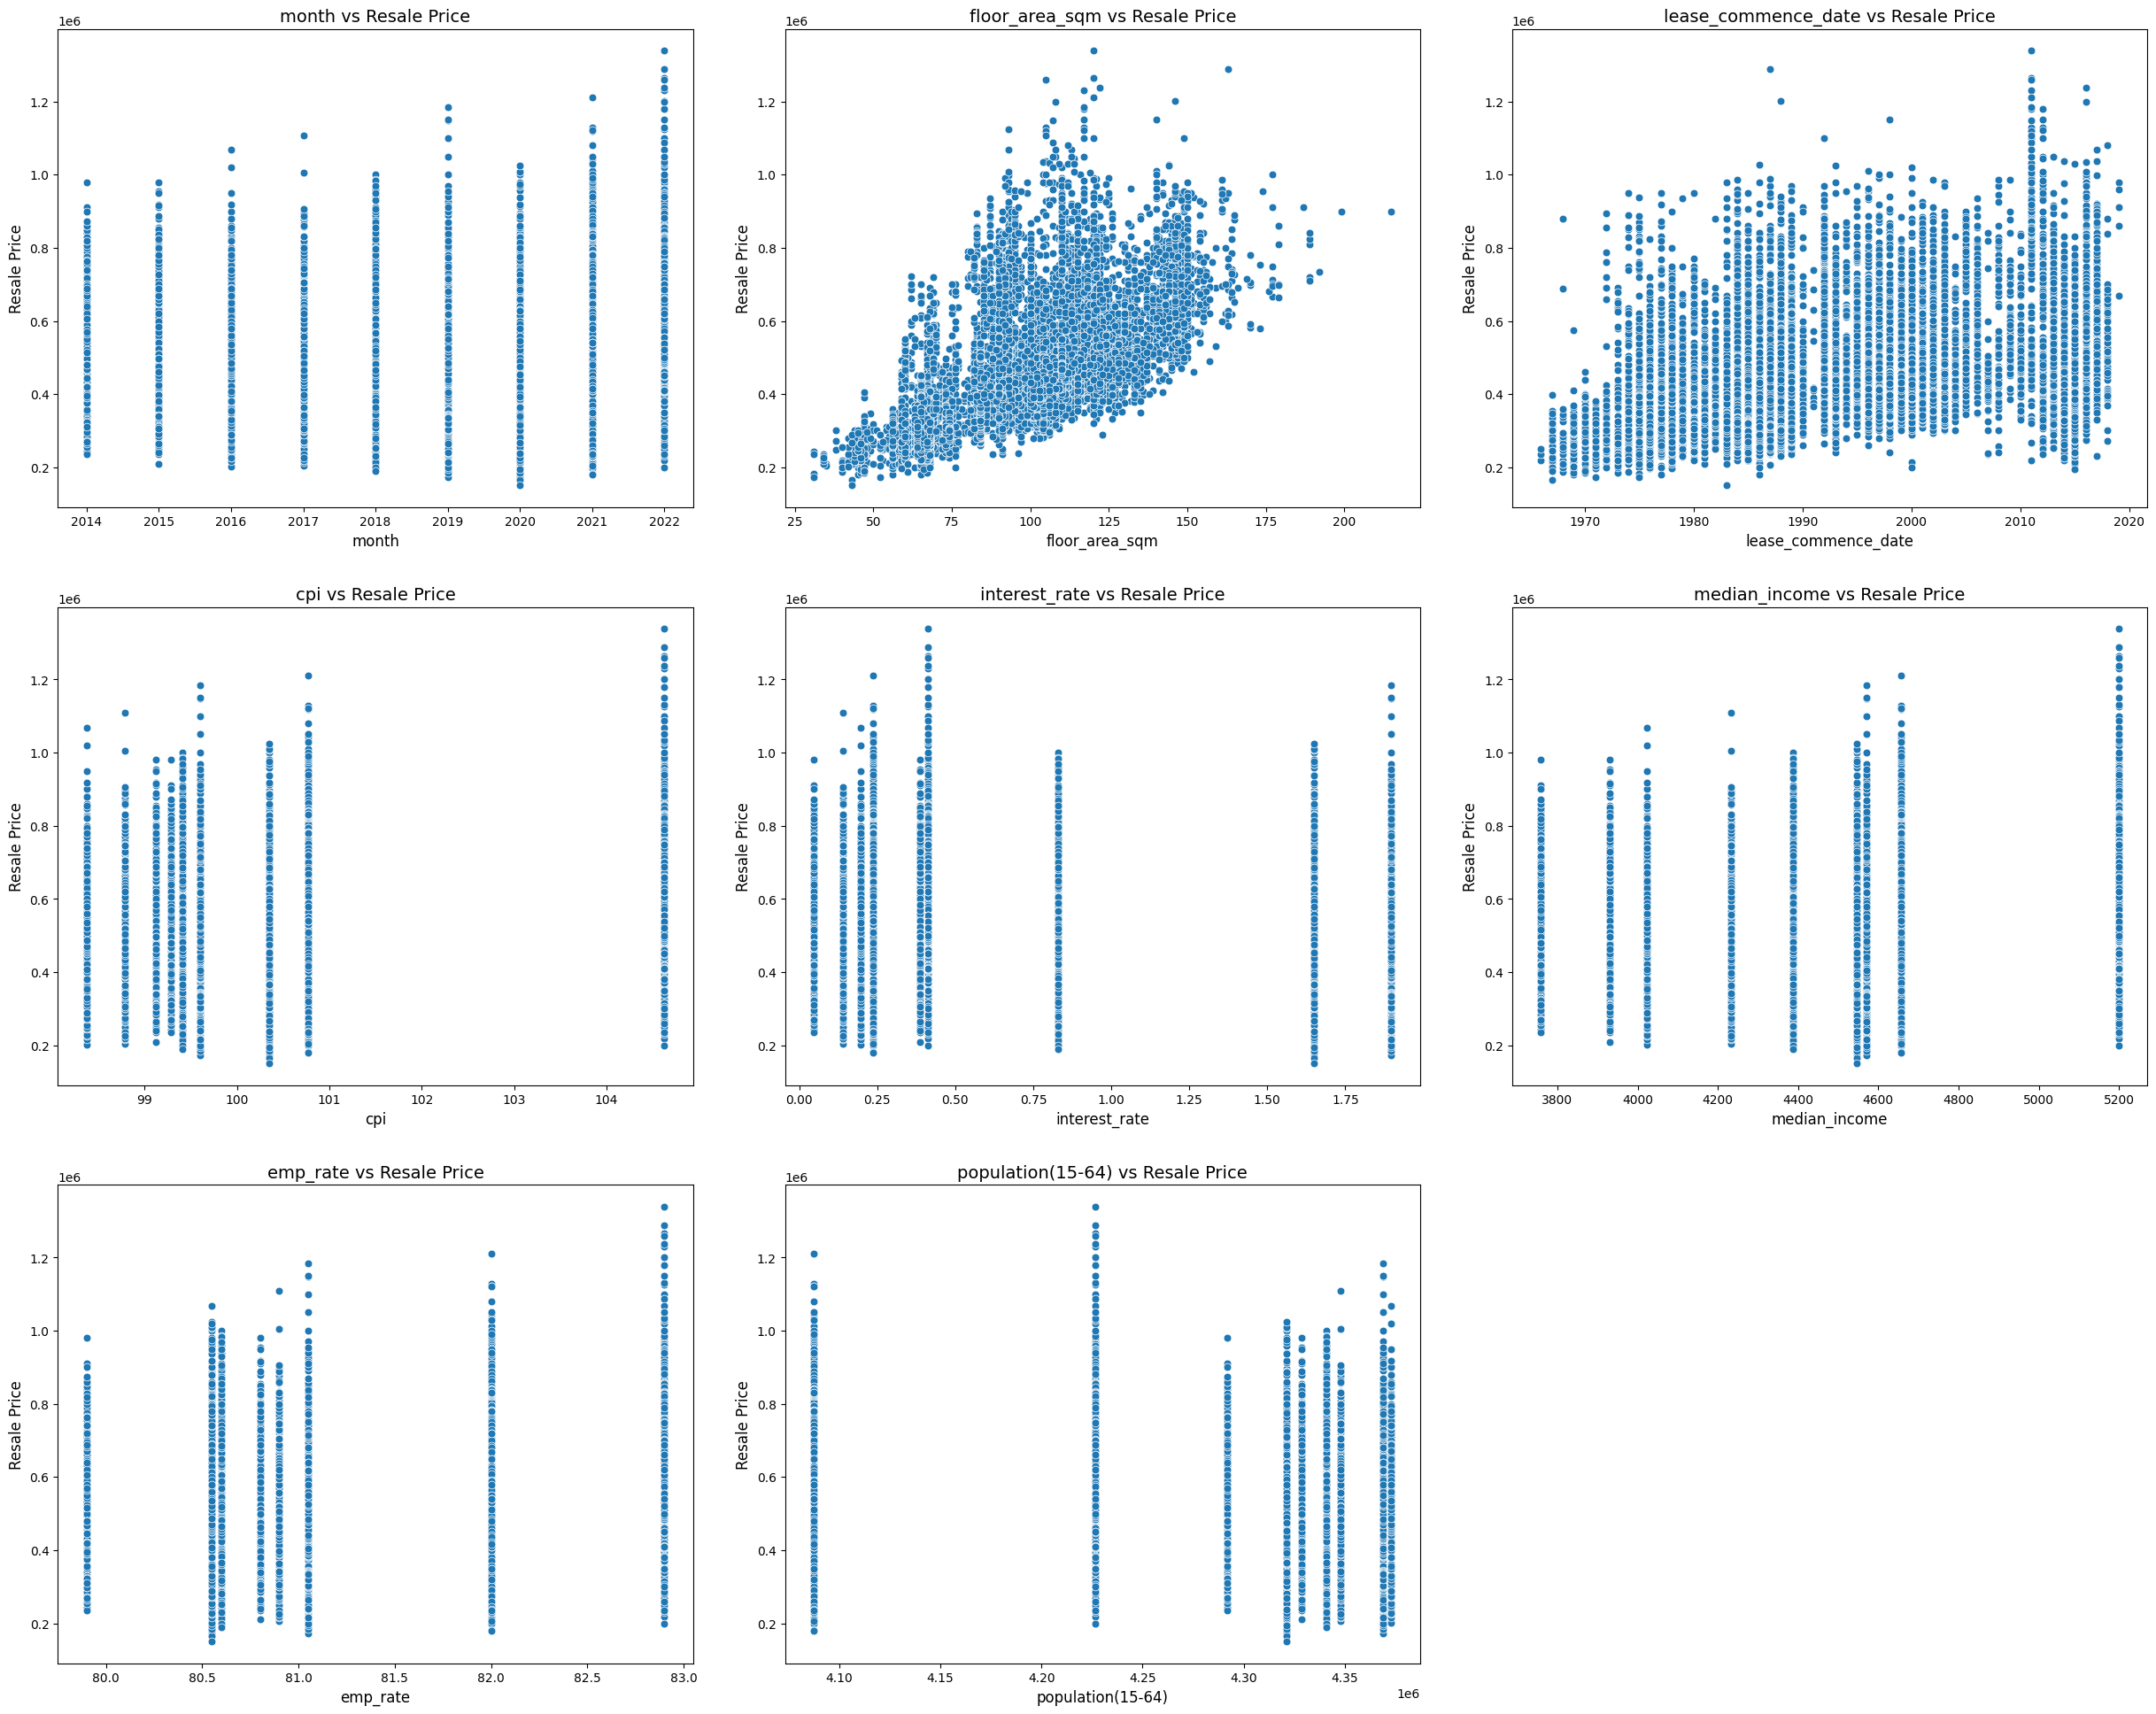

In [1197]:
# Scatter plots between features and the target variable 'resale_price' with larger plots
plt.figure(figsize=(25, 20)) 
columns_to_plot = [col for col in numerical_merged_df.columns if col != 'resale_price']  # Exclude resale_price

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(x=numerical_merged_df[col], y=numerical_merged_df['resale_price'], s=40)
    plt.title(f"{col} vs Resale Price", fontsize=14) 
    plt.xlabel(col, fontsize=12) 
    plt.ylabel("Resale Price", fontsize=12)  

plt.tight_layout(pad=3.0)  # Add padding between plots
plt.show()

## 5.2: Plot Distribution of different features

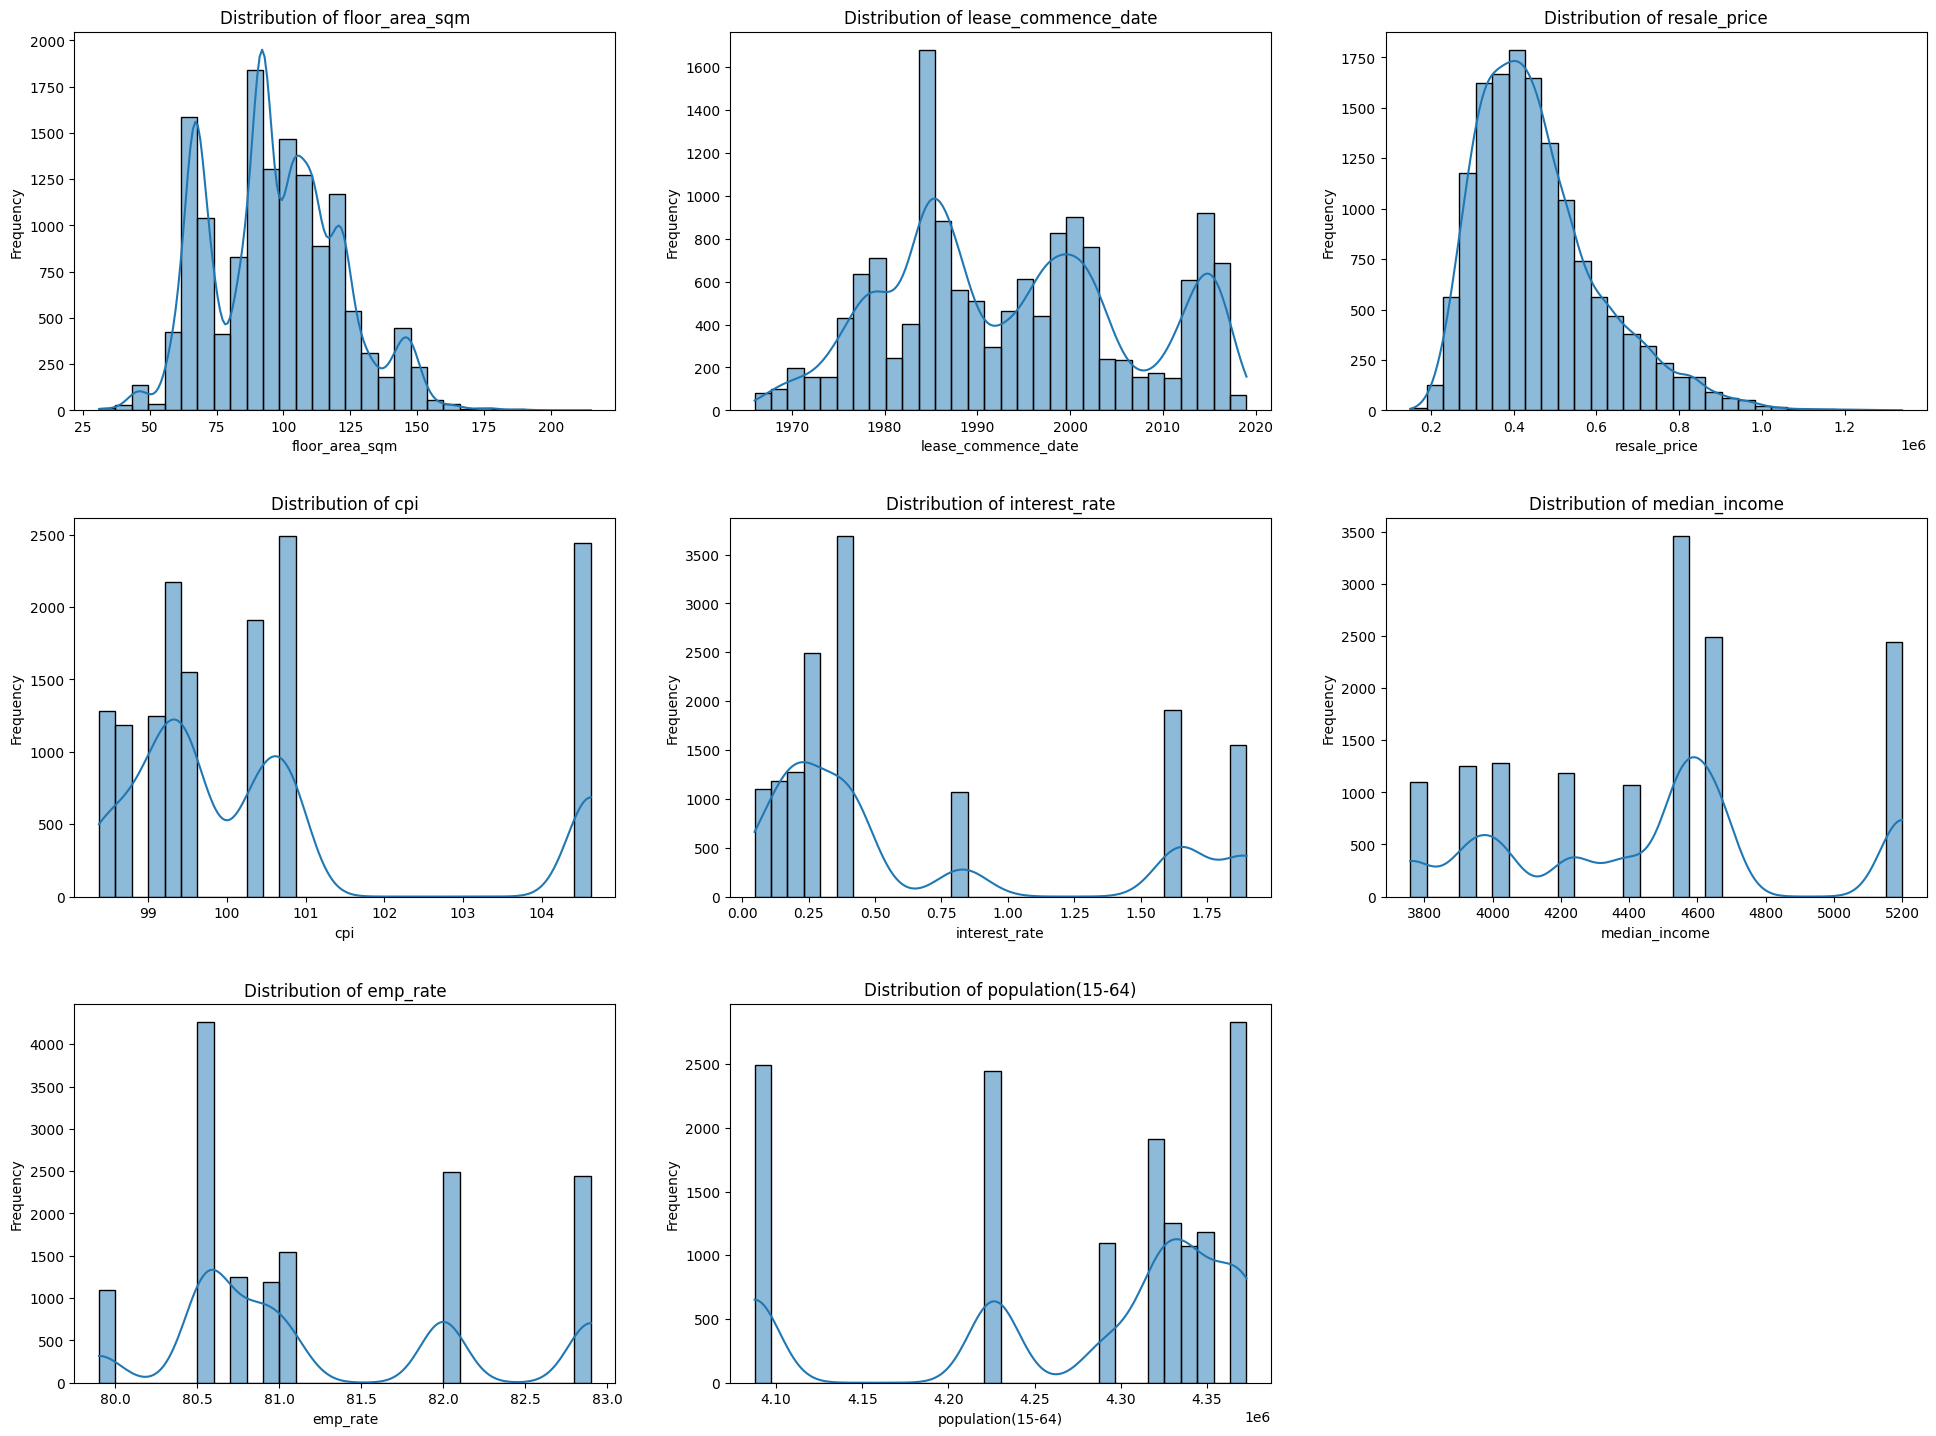

In [1198]:
# Visualize distributions with histograms and KDE
plt.figure(figsize=(20, 15))
columns_to_visualize = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 
                        'cpi', 'interest_rate', 'median_income', 'emp_rate', 'population(15-64)']

for i, col in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)
    sns.histplot(numerical_merged_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout(pad=3.0)
plt.show()

## 5.3: Correlation Matrix

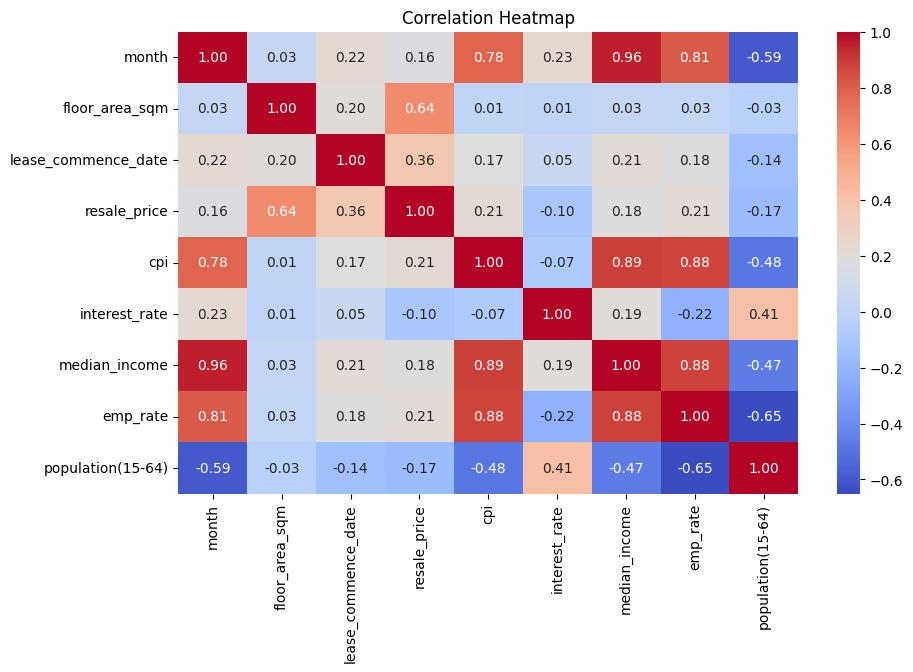

In [1199]:
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_merged_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Conclusion:

- floor_area_sqm have a strong positive correlation with resale_price, which is expected.
- Other features have weak correlations with resale_price, which may require further testing to determine their significance.

## 5.4: Distribution of Resale Price

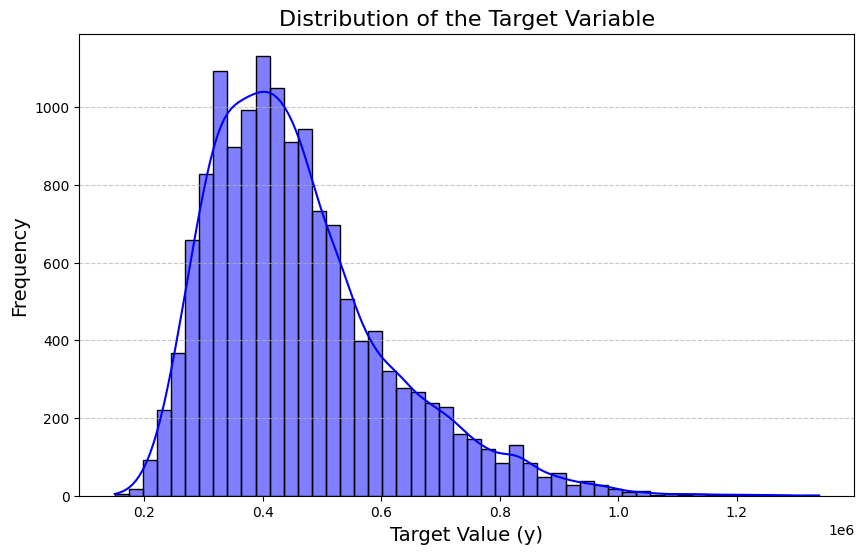

In [1200]:
plt.figure(figsize=(10, 6))
sns.histplot(numerical_merged_df["resale_price"], bins=50, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of the Target Variable', fontsize=16)
plt.xlabel('Target Value (y)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. Build and Train the ML Model

A linear regression model was built to predict resale prices.

Model Development
- Features: Key features such as floor_area_sqm, lease_commence_date, and CPI were selected based on correlation analysis.
- Target Variable: resale_price (log-transformed).
- Training and Testing:
- Dataset split: 80% training, 20% testing.
- Scikit-learn’s Linear Regression model was used for implementation.

Model Evaluation
- Performance Metrics:
- Mean Squared Error (MSE): [Insert value]
- R-squared (R²): [Insert value]

The results indicate that the model effectively captures the linear relationships in the dataset, with reasonable predictive accuracy.

## 6.1 Split the Dataset

In [1201]:
# Splitting the Dataset
numerical_merged_df['resale_price'] = numerical_merged_df['resale_price'] / 1000000 

# X = numerical_merged_df[['floor_area_sqm', 'lease_commence_date']]
X = numerical_merged_df.drop(columns=['resale_price', 'interest_rate', 'population(15-64)', 'month'])
y = numerical_merged_df['resale_price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 6.2 Build the Linear Regression Model

In [1202]:
# Building the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("\nModel Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


Model Performance:
Mean Squared Error (MSE): 0.012162284117438284
R-squared (R²): 0.4846482528390972


## 6.3 Compare Predictions with Actual Values

In [1203]:
print("Predictions:", y_pred[:5])
print("Actual Values:", y_test[:5])

Predictions: [0.53515183 0.64630457 0.62140859 0.54122421 0.51752854]
Actual Values: 13363    0.510000
4046     0.605000
5325     0.853000
112      0.509938
6616     0.425000
Name: resale_price, dtype: float64


## 6.4 Scatterplot of Predictions vs Actual Values

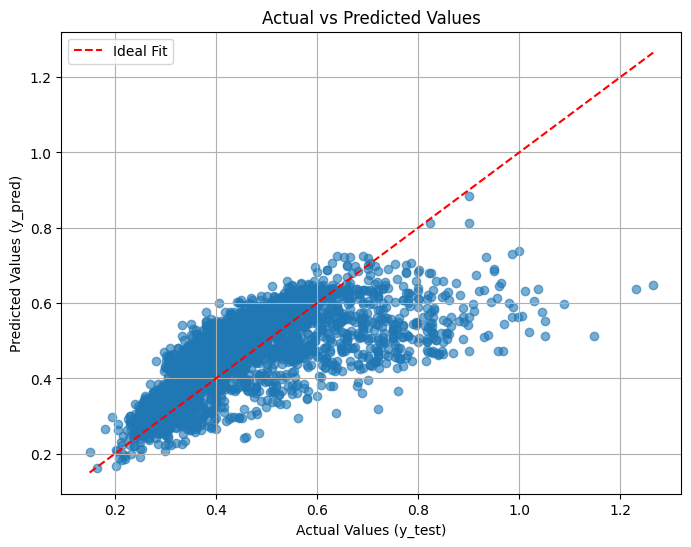

In [1204]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

# 7. Validation

Cross-validation was performed to ensure the model’s robustness:
- k-Fold Cross-Validation:
- R² mean across 5 folds: [Insert value]
- Comparison with Ridge and Lasso Regression:
- Ridge Regression R²: [Insert value]
- Lasso Regression R²: [Insert value]

The results from Ridge and Lasso suggest that the model benefits from regularization, reducing overfitting.


## 7.1: Cross-Validation

In [1205]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validated R-squared:", scores.mean())

Cross-Validated R-squared: 0.4592216481153814


## 7.2: Validation with Ridge and Lasso Regression

In [1206]:
# Ridge Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X, y)
print(f"Best Ridge Alpha: {ridge_grid.best_params_}")
print(f"Best Ridge R²: {ridge_grid.best_score_:.4f}")

# Lasso Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X, y)
print(f"Best Lasso Alpha: {lasso_grid.best_params_}")
print(f"Best Lasso R²: {lasso_grid.best_score_:.4f}")

Best Ridge Alpha: {'alpha': 100}
Best Ridge R²: 0.4602
Best Lasso Alpha: {'alpha': 0.01}
Best Lasso R²: 0.3683


# 8. Model Evaluation

The project successfully developed a linear regression model to predict resale prices. Key findings include:
1.	Model Performance:
- The model achieved an R² score of 0.45, indicating a good fit for the data.
- Transformations and feature engineering improved performance metrics.
2. Domain Contributions:
- Insights into factors affecting resale prices can guide housing policy and investment decisions.
3. Transferability:
- The approach is transferable to other regions or property types by adjusting the dataset and features.

Future work could explore non-linear models to capture complex relationships and include additional socio-economic variables for improved predictions.

# 9. Feature Engineering

Additional techniques were applied to enhance model performance:
1. Transformations:
- Log-transformed resale_price and CPI.
- Square root transformation for interest_rate.
2. Scaling:
- Standardized all numerical columns for consistency.
3. Categorical Encoding:
- Applied label encoding to variables like flat_type and town.

These steps significantly improved the model’s predictive accuracy.

## 8.1: Feature Selection and Transformation

In [1207]:
# Copy the dataframe
prepared_df = merged_df.copy()

### 8.1.1: Extract Middle Storey

- Convert 'storey_range' to 'middle_storey' by extracting the middle storey.
- Eg. '01 TO 03' -> 2

In [1208]:
def extract_middle(storey):
    # Split the range
    start, end = map(int, storey.split(" TO "))
    # Calculate the middle
    return (start + end) // 2

# Extract the middle value from storey_range and drop the original column
prepared_df['storey'] = prepared_df['storey_range'].apply(extract_middle)
prepared_df.drop(columns=['storey_range'], inplace=True)

### 8.1.2: Convert Month Column to Year

- As model cannot process datetime, convert 'month' column to 'year' column.
- Then drop the 'month' column.

In [1209]:
# Extract year and month from 'month' column
prepared_df['year'] = pd.to_datetime(prepared_df['month']).dt.year
# Drop the 'month' column
prepared_df = prepared_df.drop(columns=['month'])

### 8.1.3: Label Encode Categorical Columns

- Address, town, flat_type, and storey_range are categorical columns.
- Label encode these columns to convert them to numerical values.

In [1210]:
# Use Label Encoding for columns with many unique values
label_encodable_columns = ['address', 'town', 'flat_model', 'flat_type']

for column in label_encodable_columns:
    le = LabelEncoder()
    prepared_df[column] = le.fit_transform(prepared_df[column])

### 8.1.4: Transform Skewed Columns

In [1211]:
# Apply Transformations to Skewed Data
# Log transformations
prepared_df['resale_price_log'] = np.log1p(prepared_df['resale_price'])  
prepared_df['cpi_log'] = np.log1p(prepared_df['cpi']) 

# Square root transformation
prepared_df['interest_rate_sqrt'] = np.sqrt(prepared_df['interest_rate'])  

# Inverse transformation
prepared_df['population_inverse'] = 1 / (prepared_df['population(15-64)'] + 1)  

### 8.1.5: Plot the Transformed Data

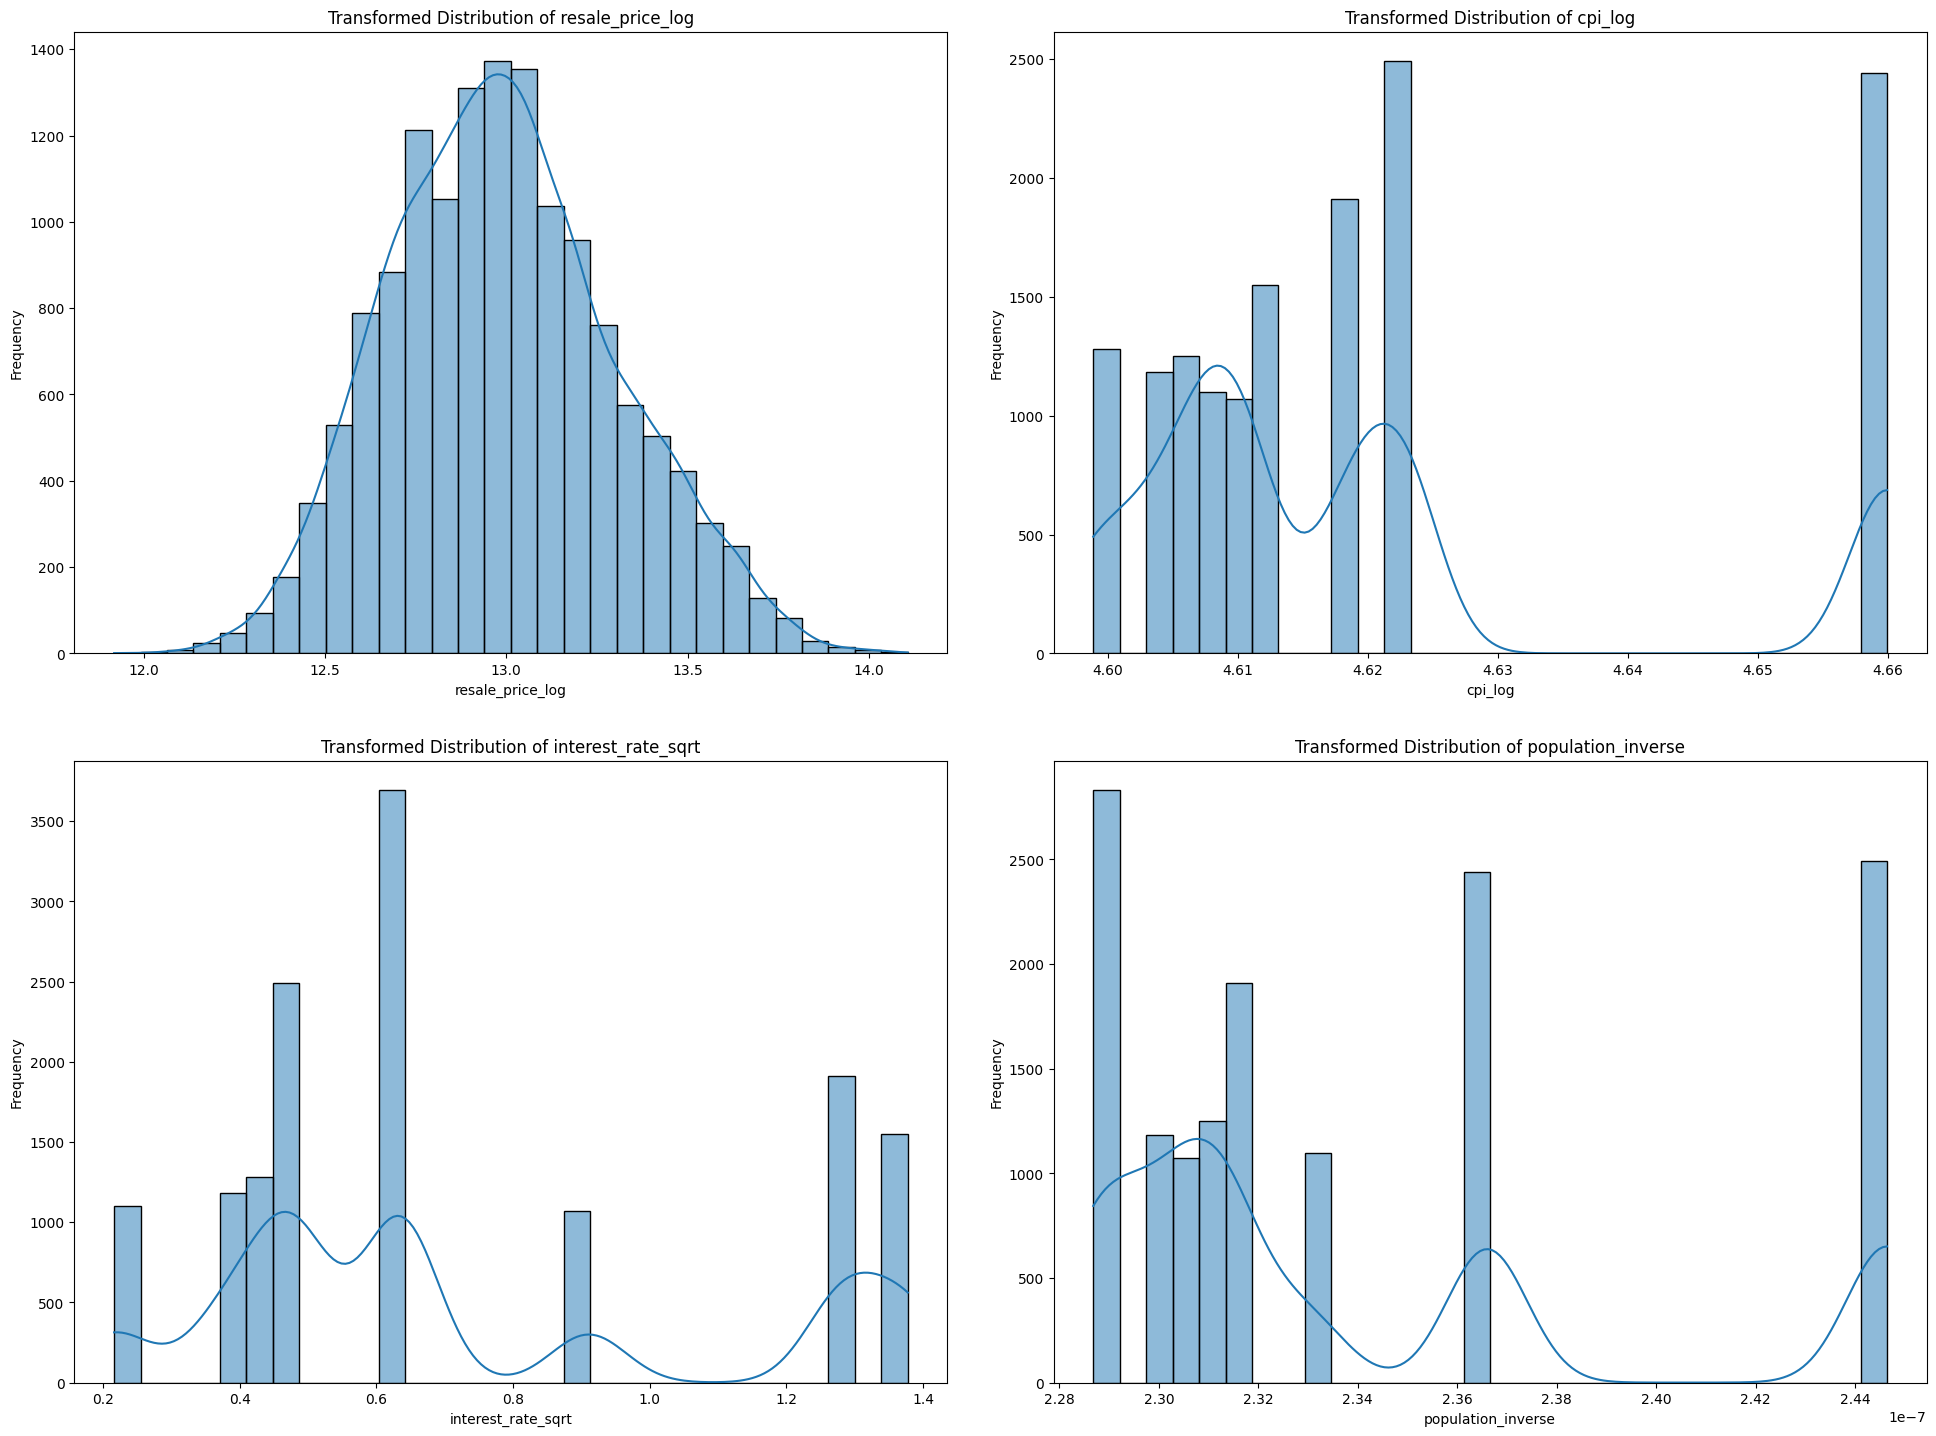

In [1212]:
# Visualize transformed distributions
plt.figure(figsize=(20, 15))
transformed_columns = ['resale_price_log', 'cpi_log', 'interest_rate_sqrt', 'population_inverse']

for i, col in enumerate(transformed_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(prepared_df[col], kde=True, bins=30)
    plt.title(f"Transformed Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout(pad=3.0)
plt.show()

### 8.1.6: Scale Numerical Columns

In [1213]:
# Scale numerical columns
scaler = StandardScaler()
numerical_columns = prepared_df.select_dtypes(include=['float64', 'int64']).columns
prepared_df[numerical_columns] = scaler.fit_transform(prepared_df[numerical_columns])

### 8.1.7: View the Transformed Dataframe

In [1214]:
prepared_df.head()

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,cpi,interest_rate,median_income,emp_rate,population(15-64),storey,year,resale_price_log,cpi_log,interest_rate_sqrt,population_inverse
0,-0.342123,-1.208876,-1.364907,2.047671,-0.596320,-0.873211,0.468364,2.051018,-0.395475,1.665853,1.747001,-0.504,-1.142164,2022,-0.926950,2.044568,-0.226172,0.474744
1,-0.342123,-1.208876,-0.993062,0.863139,-1.209164,-0.984614,-0.869733,2.051018,-0.395475,1.665853,1.747001,-0.504,-1.142164,2022,-1.096824,2.044568,-0.226172,0.474744
2,-0.342123,-1.208876,-1.282275,0.863139,-0.902742,-0.905977,-1.561888,2.051018,-0.395475,1.665853,1.747001,-0.504,-0.617996,2022,-0.975978,2.044568,-0.226172,0.474744
3,-0.342123,-1.208876,-1.364907,2.047671,-0.596320,-0.951849,0.934128,2.051018,-0.395475,1.665853,1.747001,-0.504,-1.142164,2022,-1.045913,2.044568,-0.226172,0.474744
4,-0.342123,-1.208876,-1.240959,0.863139,-0.060082,-0.951849,-0.319332,2.051018,-0.395475,1.665853,1.747001,-0.504,-1.142164,2022,-1.045913,2.044568,-0.226172,0.474744


### 8.1.8: Plot Updated Correlation Matrix

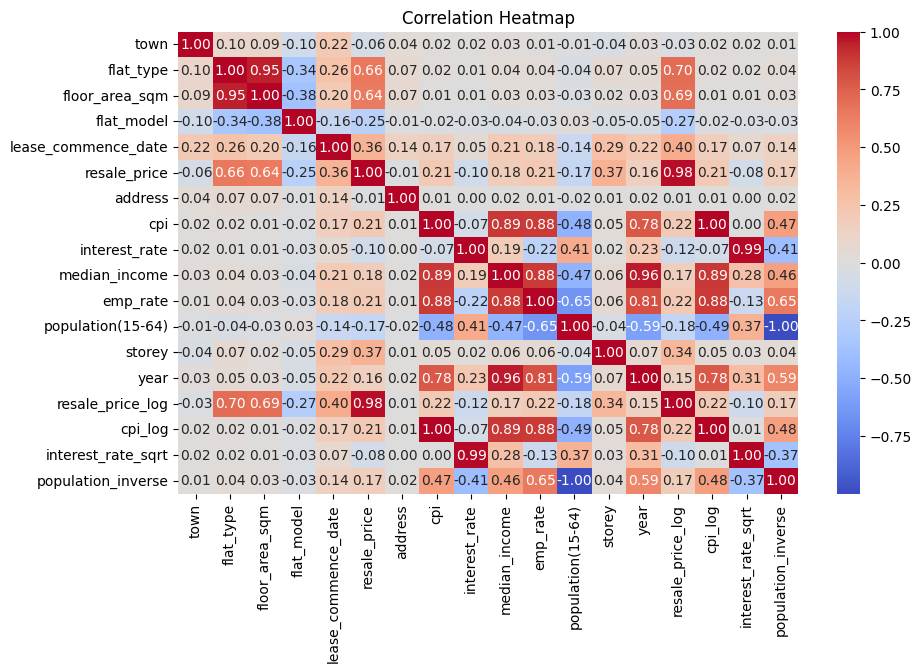

In [1215]:
plt.figure(figsize=(10, 6))
sns.heatmap(prepared_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 8.2: Rebuilding Linear Model with Updated Features

### 8.2.1: Prepare the Data for Training

- Remove features with low correlation with resale_price.
- Split the dataset into training(80%) and testing sets(20%).

In [1216]:
# Separate features (X) and target (y)
# columns_to_drop = ['town', 'address', 'interest_rate', 'median_income', 'population(15-64)', 'storey' , 'resale_price_log', 'population_inverse', 'interest_rate_sqrt', 'resale_price']
columns_to_drop = ['resale_price_log', 'resale_price']
X = prepared_df.drop(columns=columns_to_drop)  
y = prepared_df['resale_price_log'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 8.2.2: Train the Model

In [1217]:
# Building the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("\nModel Performance:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


Model Performance:
Mean Squared Error (MSE): 0.3001954253641049
R-squared (R²): 0.7013080925863757


### 8.2.3: Plot the Prediction Results

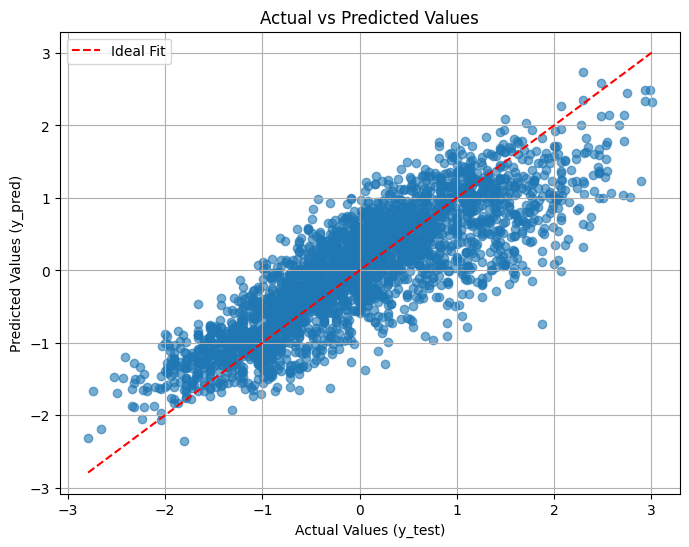

In [1218]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

## 8.3: Cross Validation

- Perform cross-validation to validate the model's performance.
- Evaluate the model using RMSE, MAE, and R2 scores.

In [1219]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validated R-squared:", scores.mean())

Cross-Validated R-squared: -1.034379661197786e+23


In [1220]:
# Ridge Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X, y)
print(f"Best Ridge Alpha: {ridge_grid.best_params_}")
print(f"Best Ridge R²: {ridge_grid.best_score_:.4f}")

# Lasso Hyperparameter Tuning
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X, y)
print(f"Best Lasso Alpha: {lasso_grid.best_params_}")
print(f"Best Lasso R²: {lasso_grid.best_score_:.4f}")

Best Ridge Alpha: {'alpha': 100}
Best Ridge R²: 0.5768
Best Lasso Alpha: {'alpha': 0.01}
Best Lasso R²: 0.5968


# 10. Evaluation of the New Model

## Evaluation
Discuss model results, potential improvements, and transferability.